**Bárbara Freitas - IA**

**Vamos carregar a base de dados:**

In [4]:
from sklearn import datasets
wine = datasets.load_wine()

 **Fazer a validação cruzada:**

In [11]:
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(
   wine.data[:,:12], wine.target, test_size=0.4
)

**Treinar o modelo:**

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
clf.fit(X_training, y_training)

yp=clf.predict(X_testing)

**Analisar os resultados:**

Matriz de confusão, sem normalizar
[[ 0 24  0]
 [ 7 19  5]
 [ 0  8  9]]
Matriz de confusão normalizada
[[0.         1.         0.        ]
 [0.22580645 0.61290323 0.16129032]
 [0.         0.47058824 0.52941176]]


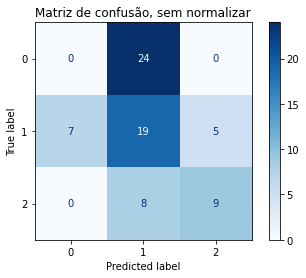

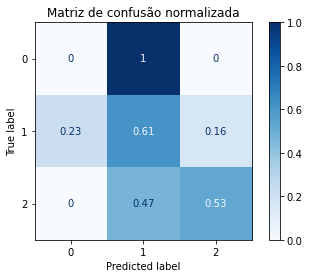

In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_testing, y_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_testing, yp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.37      0.61      0.46        31
           2       0.64      0.53      0.58        17

    accuracy                           0.39        72
   macro avg       0.34      0.38      0.35        72
weighted avg       0.31      0.39      0.34        72



**Iremos utilizar a correlação para tentar melhorar os resultados:**


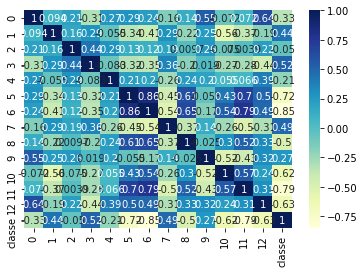

In [15]:
import seaborn as sns
import numpy as np
import pandas

tabela = pandas.DataFrame(wine.data)
tabela['classe'] = wine.target
correlacoes = tabela.corr()
sns.heatmap(correlacoes, cmap="YlGnBu", annot = True)

**Vamos escolher as duas variáveis mais correlacionadas com a saída**

In [16]:
wine_n = np.array(wine.data[:,[5,6]])
Xn_training, Xn_testing, yn_training, yn_testing = train_test_split(
   wine_n, wine.target, test_size=0.4
)

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
clf.fit(Xn_training, yn_training)

yp=clf.predict(Xn_testing)

Matriz de confusão, sem normalizar
[[20  3  0]
 [ 5 21  0]
 [ 0  4 19]]
Matriz de confusão normalizada
[[0.86956522 0.13043478 0.        ]
 [0.19230769 0.80769231 0.        ]
 [0.         0.17391304 0.82608696]]


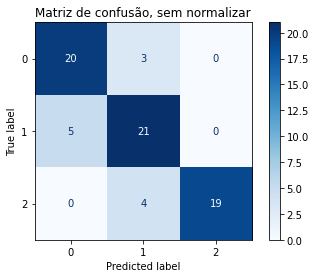

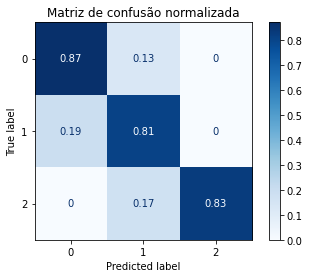

In [18]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xn_testing, yn_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## **Resultado melhorado**

In [19]:
wine_n = np.array(wine.data[:,[10,11]])
Xn_training, Xn_testing, yn_training, yn_testing = train_test_split(
   wine_n, wine.target, test_size=0.4
)

In [20]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='relu')
clf.fit(Xn_training, yn_training)

yp=clf.predict(Xn_testing)

Matriz de confusão, sem normalizar
[[14 10  0]
 [11 15  0]
 [ 0  1 21]]
Matriz de confusão normalizada
[[0.58333333 0.41666667 0.        ]
 [0.42307692 0.57692308 0.        ]
 [0.         0.04545455 0.95454545]]


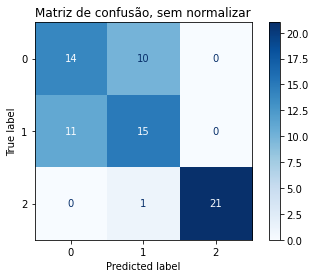

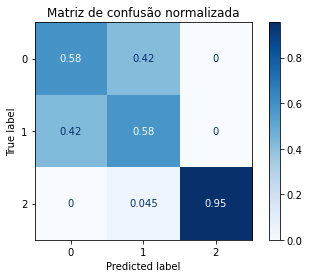

In [21]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xn_testing, yn_testing,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**Observações:** como podemos observar, a matriz de confusão obtida escolhendo as colunas 11 e 12 apresenta valores de erro menores no geral, com 3 situações de erro 0.

## Árvore de decisão

In [22]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import pandas as pd

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target,test_size=0.3)

In [25]:
clf = tree.DecisionTreeClassifier()

In [26]:
clf = clf.fit(X_train,y_train)

In [27]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42200002, 0.        , 0.        , 0.39746733,
       0.        , 0.        , 0.18053265])

In [28]:
for feature,importancia in zip(wine.feature_names,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

alcohol:0.0
malic_acid:0.0
ash:0.0
alcalinity_of_ash:0.0
magnesium:0.0
total_phenols:0.0
flavanoids:0.4220000187883399
nonflavanoid_phenols:0.0
proanthocyanins:0.0
color_intensity:0.39746733177390126
hue:0.0
od280/od315_of_diluted_wines:0.0
proline:0.18053264943775896


In [29]:
resultado = clf.predict(X_test)
resultado

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1,
       1, 1, 0, 2, 2, 0, 0, 1, 1, 2])

Matriz de confusão, sem normalizar
[[17  1  0]
 [ 0 19  3]
 [ 0  0 14]]
Matriz de confusão normalizada
[[0.94444444 0.05555556 0.        ]
 [0.         0.86363636 0.13636364]
 [0.         0.         1.        ]]


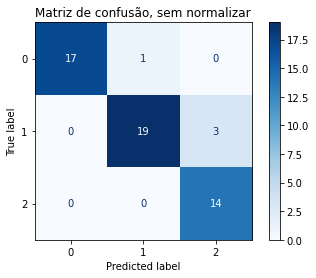

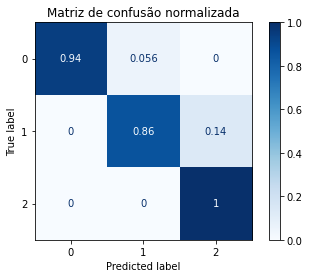

In [30]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## KNN

In [31]:
import numpy as np
import pandas as pd

In [32]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)

In [33]:
y = pd.Categorical.from_codes(wine.target, wine.target_names)
y = pd.get_dummies(y)

In [34]:
print(X.shape)
print(y.shape)

(178, 13)
(178, 3)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fitting scaler to the feature
scaler.fit(X)

StandardScaler()

In [36]:
scaled_features = scaler.transform(X)

In [37]:
df_feat = pd.DataFrame(scaled_features,columns=X.columns)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y, test_size=0.20)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test.values.argmax(axis=1), pred.argmax(axis=1)))

[[11  0  0]
 [ 1 10  0]
 [ 0  0 14]]


In [42]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        14

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36
 samples avg       0.97      0.97      0.97        36



In [63]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9722222222222222


## K-Means

In [44]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans

In [56]:
names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
'Proline']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = names)
#data.head(100)

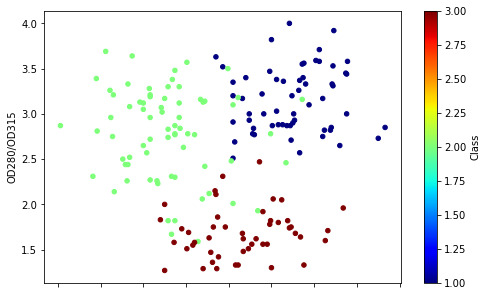

In [60]:
data.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= 'Class', figsize=(8,5), colormap='jet')
data.iloc[:,[12,1]].head()
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(data.iloc[:,[12,1]])

In [67]:
distance = kmeans.fit_transform(X)
distance

array([[ 131.92263323,  339.70709053,  609.72961712],
       [ 145.37982131,  324.00291809,  593.83682803],
       [  11.28739369,  458.87261161,  728.76759782],
       [ 284.96039271,  753.93315579, 1023.93679979],
       [ 460.33893101,   17.1001969 ,  279.90041407],
       [ 254.94342746,  723.92793479,  993.92591192],
       [  95.36352845,  563.93807109,  833.7418357 ],
       [ 101.05475563,  569.13338093,  839.20887359],
       [ 150.42534491,  318.9920599 ,  588.77258888],
       [ 150.34962088,  318.94507303,  588.76808208],
       [ 314.8538496 ,  783.86530837, 1053.79178766],
       [  85.51018398,  553.93578479,  823.72325921],
       [ 125.94312634,  594.05153849,  863.72859063],
       [  47.7821734 ,  424.14287979,  693.78044981],
       [ 351.91192498,  820.90590877, 1090.79565968],
       [ 115.04730434,  583.93036174,  853.95093795],
       [  86.1355137 ,  554.10656625,  824.1811737 ],
       [  65.9146233 ,  404.02777635,  674.10067213],
       [ 484.86842171,  953.

Cada valor corresponde a distância entre a instância de dados corrente e cada um dos três clusters.

#### Observações:
    Percebemos que o KNN apresenta resultados muito bons mostrados na matriz de confusão, com acurácia de 97%. 
    O k-means também consegue realizar uma clusterização adequada.